### Data Evaluation

##### Data Origin

> The data in the 'COVID-19_Radiography_Dataset' from kaggle is composed of several origins. We can evaluate, if we identify differences in data quality

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [3]:
COVID_FOLDER = 'COVID-19_Radiography_Dataset'

parent_folder = os.path.dirname(os.getcwd())
folder_path = os.path.join(parent_folder, COVID_FOLDER)
print(folder_path)
files = os.listdir(folder_path)  # List all files and folders
print(files)

/Users/markusfuchs/Development/Machine Learning Engineer/Covid-19_detection/COVID-19_Radiography_Dataset
['Lung_Opacity.metadata.xlsx', 'Viral Pneumonia.metadata.xlsx', 'Viral Pneumonia', 'COVID.metadata.xlsx', 'Normal.metadata.xlsx', 'Lung_Opacity', 'Normal', 'COVID', 'README.md.txt']


In [4]:
folder_covid = os.path.join(folder_path, 'COVID')
folder_normal = os.path.join(folder_path, 'Normal')
folder_lung_opacity = os.path.join(folder_path, 'Lung_Opacity')
folder_viral_pneumonia = os.path.join(folder_path, 'Viral Pneumonia')

sub_image = 'images'
sub_mask = 'masks'

##### reusable functions

In [5]:
def create_origin_dictionary(metadata):
    file_dict = {}
    for url in metadata.URL.unique():
        file_list = metadata[metadata.URL == url].reset_index(drop=True)
        file_dict[url] = [row['FILE NAME'].lower().capitalize() + '.' + row['FORMAT'].lower() for _, row in file_list.iterrows()]
    return file_dict

In [6]:
def make_img_file_path(img_name, folder, mask=False):
    if (mask):
        return os.path.join(folder, sub_mask, img_name)
    else:
        return os.path.join(folder, sub_image, img_name)

In [7]:
def show_sample_images(origin_dictionary, image_path):
    for url, file_names in origin_dictionary.items():
        print('URL:', url)
        random_files = np.random.choice(file_names, 9)
        random_file_names = [make_img_file_path(file_name, image_path) for file_name in random_files]    

        plt.figure(figsize=(12,14))
        i = 1
        for file_name,file_path in zip(random_files,random_file_names):
            plt.subplot(3,3,i)
            plt.imshow(plt.imread(file_path), cmap='gray')
            plt.xticks([])
            plt.yticks([])
            plt.title(file_name)
            i += 1
        plt.show()

##### Evaluate 'normal' images (show some examples of each origin)

In [8]:
excel_path_normal = os.path.join(folder_path,'Normal.metadata.xlsx')
print(excel_path_normal)
df_normal = pd.read_excel(excel_path_normal)
df_normal.head()

/Users/markusfuchs/Development/Machine Learning Engineer/Covid-19_detection/COVID-19_Radiography_Dataset/Normal.metadata.xlsx


FILE NAME FORMAT     SIZE                                                URL
0  NORMAL-1    PNG  256*256  https://www.kaggle.com/c/rsna-pneumonia-detect...
1  NORMAL-2    PNG  256*256  https://www.kaggle.com/c/rsna-pneumonia-detect...
2  NORMAL-3    PNG  256*256  https://www.kaggle.com/c/rsna-pneumonia-detect...
3  NORMAL-4    PNG  256*256  https://www.kaggle.com/c/rsna-pneumonia-detect...
4  NORMAL-5    PNG  256*256  https://www.kaggle.com/c/rsna-pneumonia-detect...

In [9]:
df_normal.URL.value_counts()

URL
https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data    8851
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia       1341
Name: count, dtype: int64

In [10]:
origin_dictionary_normal = create_origin_dictionary(df_normal)
for url, file_names in origin_dictionary_normal.items():
    print('first file from URL:', url, file_names[0])

first file from URL: https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data Normal-1.png
first file from URL: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia Normal-8852.png


URL: https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data


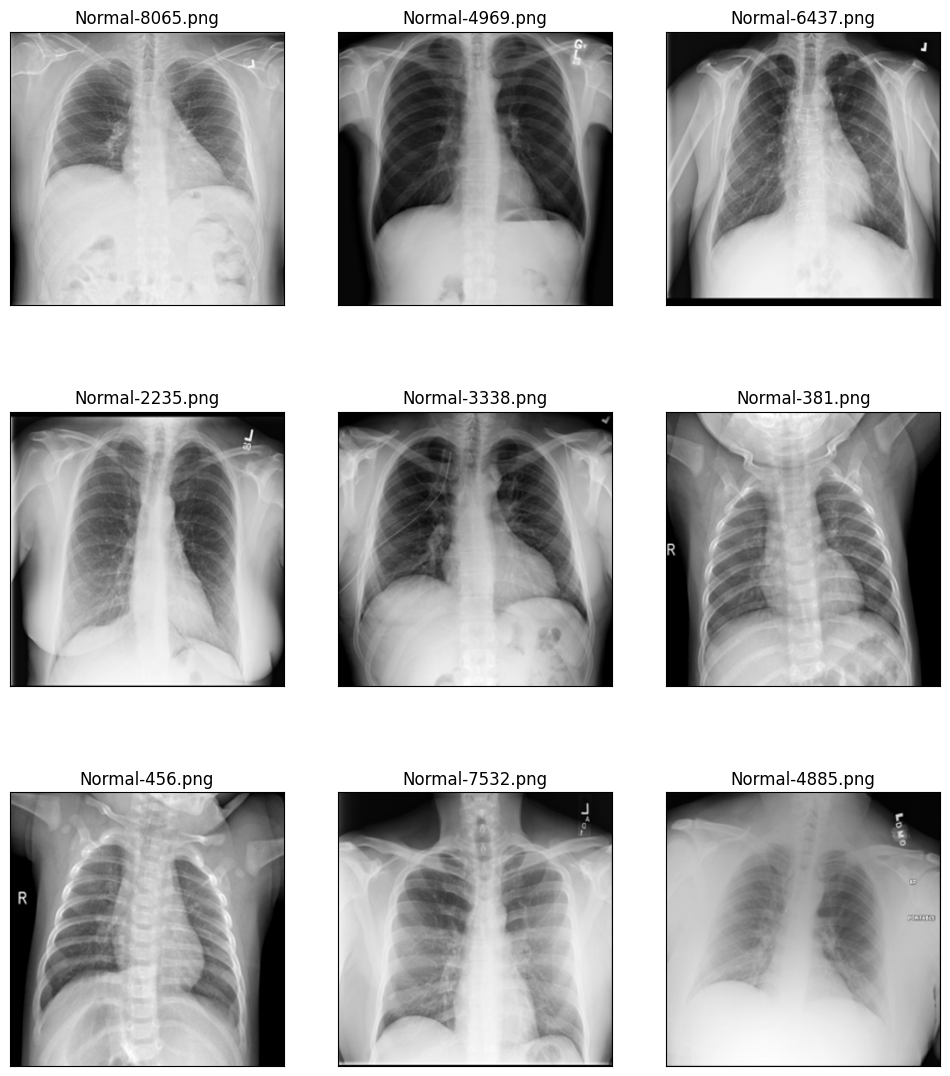

URL: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia


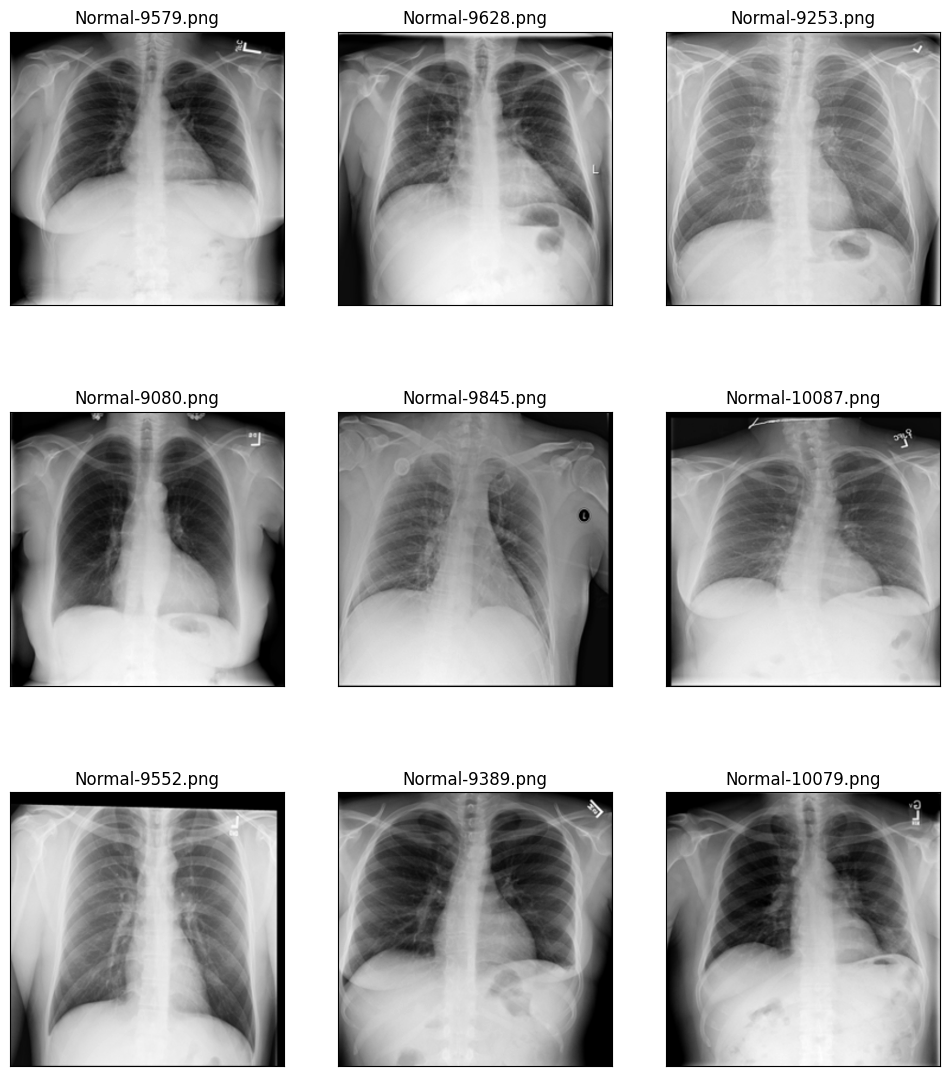

In [11]:
show_sample_images(origin_dictionary_normal, folder_normal)

##### Evaluate 'covid' images (show some examples of each origin)

In [12]:
excel_path_covid = os.path.join(folder_path,'COVID.metadata.xlsx')
print(excel_path_covid)
df_covid = pd.read_excel(excel_path_covid)
df_covid.head()

/Users/markusfuchs/Development/Machine Learning Engineer/Covid-19_detection/COVID-19_Radiography_Dataset/COVID.metadata.xlsx


FILE NAME FORMAT     SIZE                                                URL
0   COVID-1    PNG  256*256  https://sirm.org/category/senza-categoria/covi...
1   COVID-2    PNG  256*256  https://sirm.org/category/senza-categoria/covi...
2   COVID-3    PNG  256*256  https://sirm.org/category/senza-categoria/covi...
3   COVID-4    PNG  256*256  https://sirm.org/category/senza-categoria/covi...
4   COVID-5    PNG  256*256  https://sirm.org/category/senza-categoria/covi...

In [13]:
df_covid.URL.value_counts()

URL
https://bimcv.cipf.es/bimcv-projects/bimcv-covid19/#1590858128006-9e640421-6711    2474
https://github.com/armiro/COVID-CXNet                                               400
https://eurorad.org                                                                 258
https://github.com/ml-workgroup/covid-19-image-repository/tree/master/png           183
https://github.com/ieee8023/covid-chestxray-dataset                                 182
https://sirm.org/category/senza-categoria/covid-19/                                 119
Name: count, dtype: int64

In [14]:
origin_dictionary_covid = create_origin_dictionary(df_covid)
for url, file_names in origin_dictionary_covid.items():
    print('first file from URL:', url, file_names[0])

first file from URL: https://sirm.org/category/senza-categoria/covid-19/ Covid-1.png
first file from URL: https://github.com/ml-workgroup/covid-19-image-repository/tree/master/png Covid-120.png
first file from URL: https://eurorad.org Covid-303.png
first file from URL: https://github.com/armiro/COVID-CXNet Covid-561.png
first file from URL: https://github.com/ieee8023/covid-chestxray-dataset Covid-961.png
first file from URL: https://bimcv.cipf.es/bimcv-projects/bimcv-covid19/#1590858128006-9e640421-6711 Covid-1143.png


URL: https://sirm.org/category/senza-categoria/covid-19/


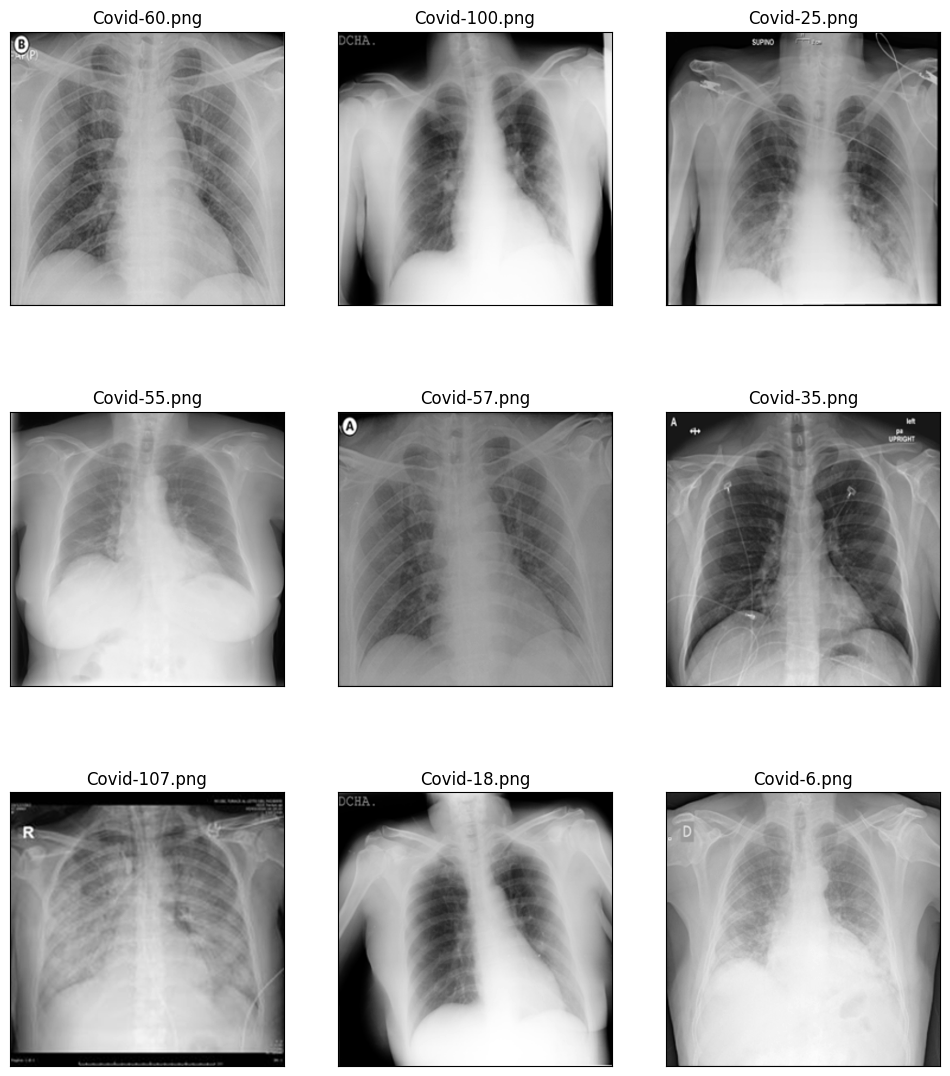

URL: https://github.com/ml-workgroup/covid-19-image-repository/tree/master/png


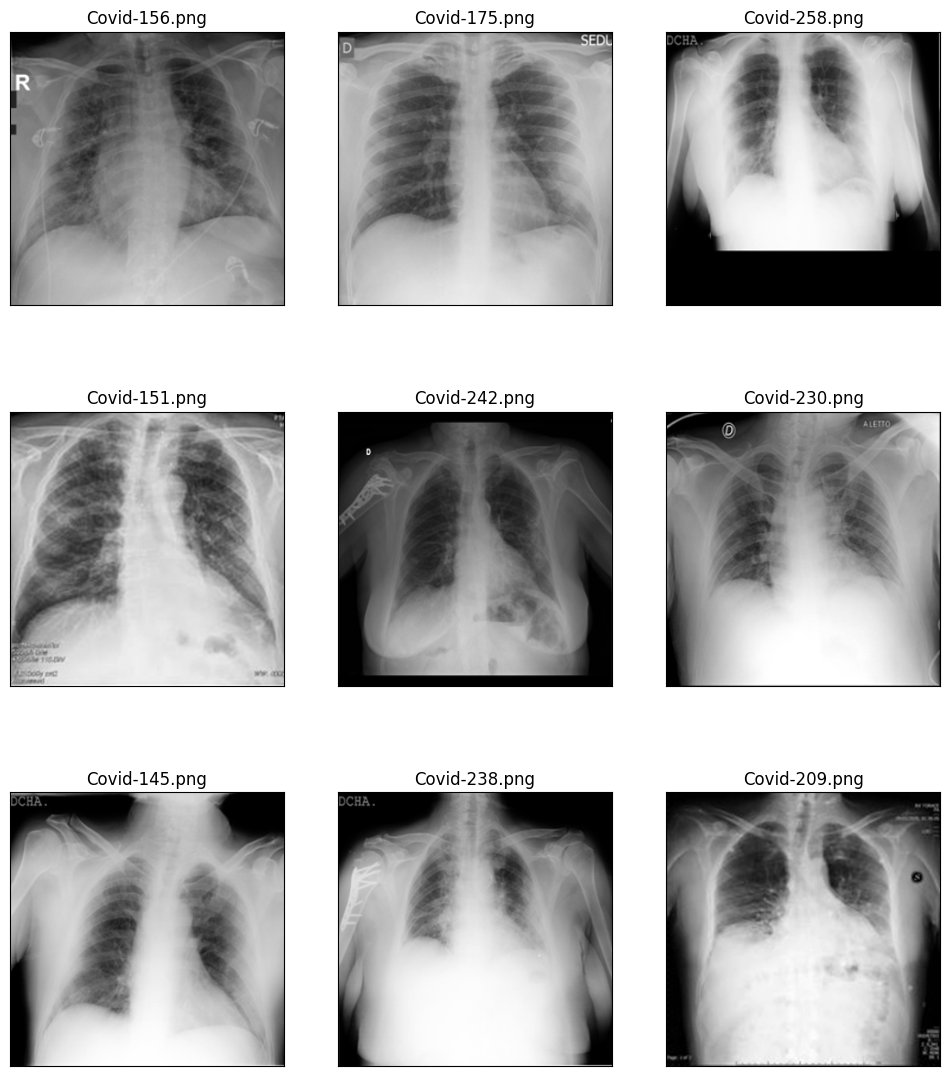

URL: https://eurorad.org


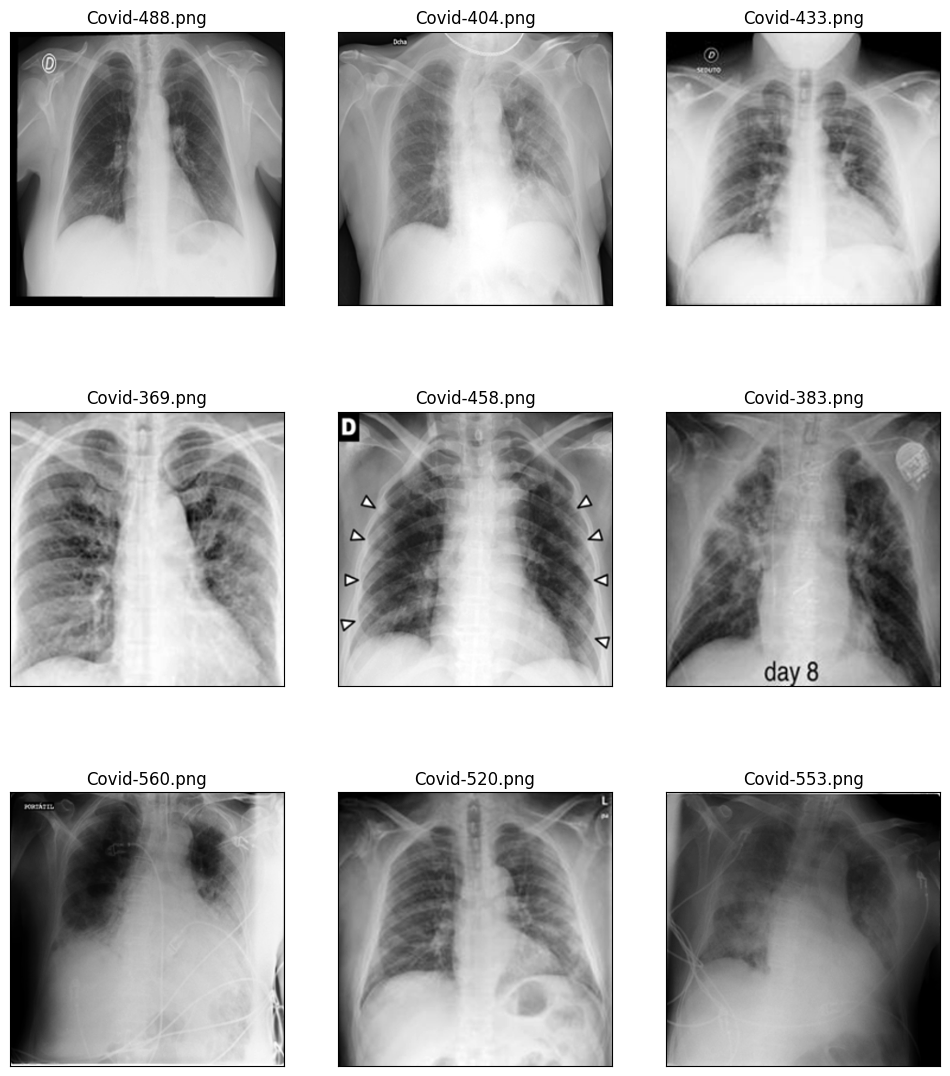

URL: https://github.com/armiro/COVID-CXNet


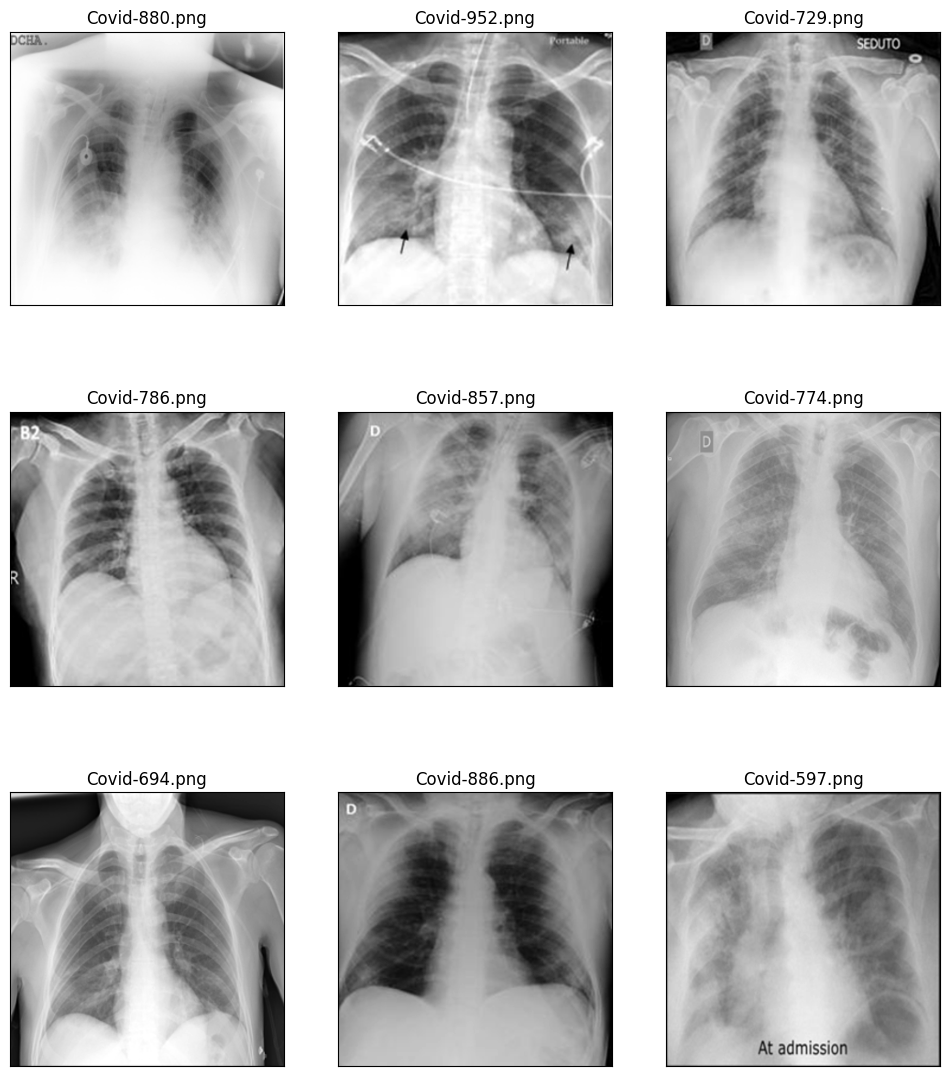

URL: https://github.com/ieee8023/covid-chestxray-dataset


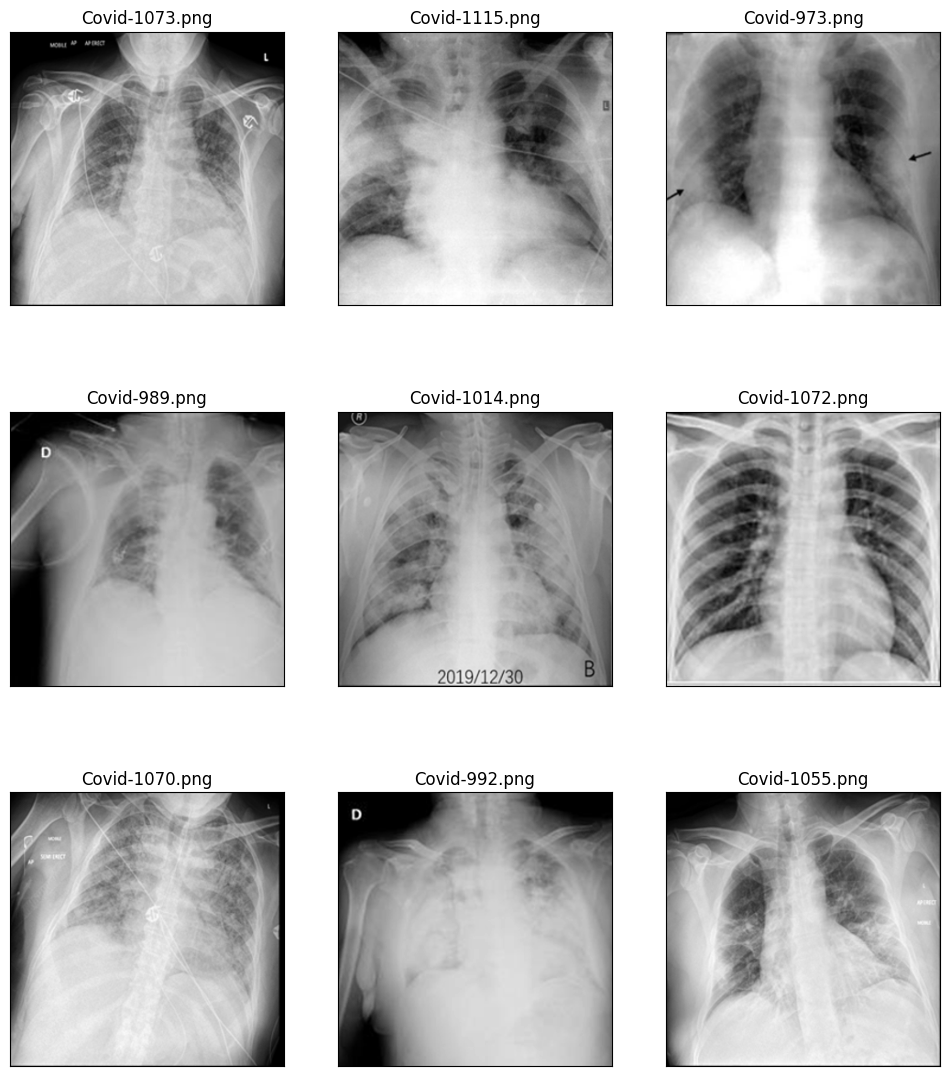

URL: https://bimcv.cipf.es/bimcv-projects/bimcv-covid19/#1590858128006-9e640421-6711


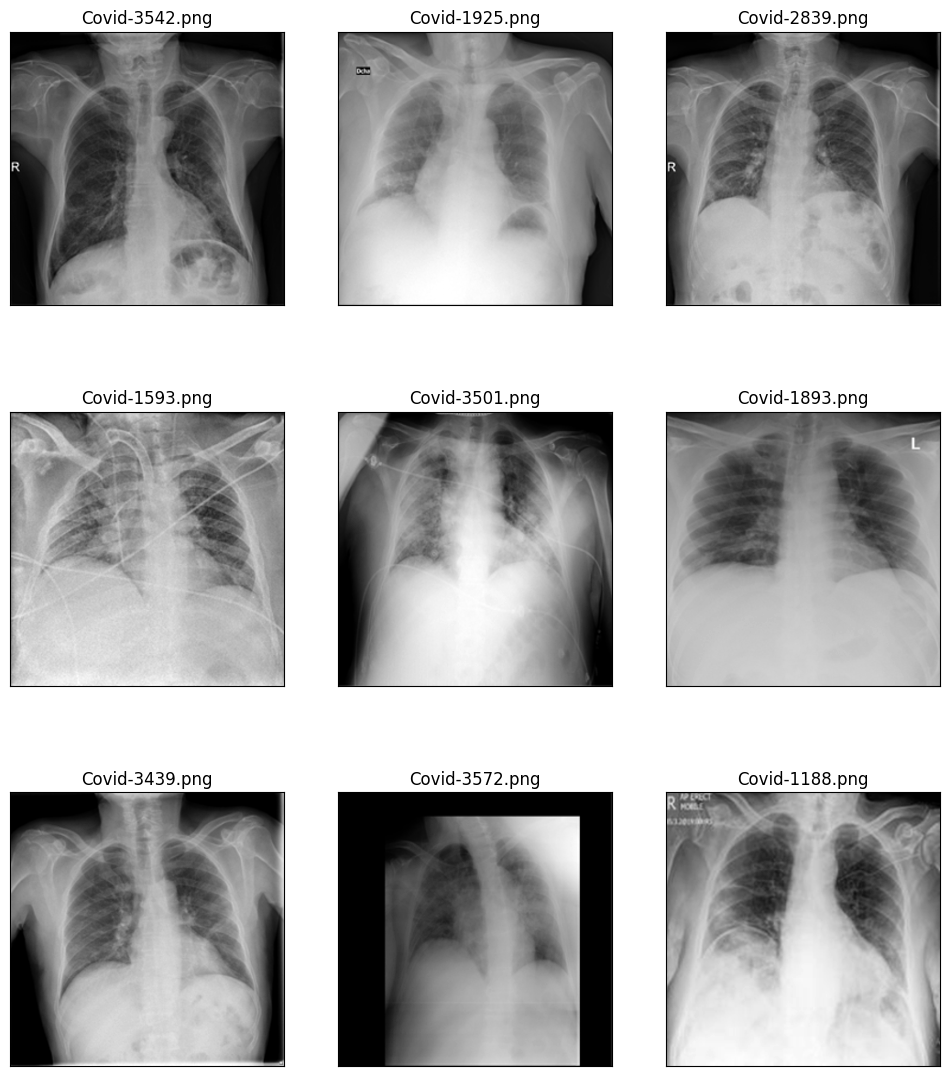

In [15]:
show_sample_images(origin_dictionary_covid, folder_covid)

##### Evaluate 'lung_opacity' images (show some examples of each origin)

In [16]:
excel_path_lung_opacity = os.path.join(folder_path,'Lung_Opacity.metadata.xlsx')
print(excel_path_lung_opacity)
df_lung_opacity = pd.read_excel(excel_path_lung_opacity)
df_lung_opacity.head()

/Users/markusfuchs/Development/Machine Learning Engineer/Covid-19_detection/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx


FILE NAME FORMAT     SIZE  \
0  Lung_Opacity-1    PNG  256*256   
1  Lung_Opacity-2    PNG  256*256   
2  Lung_Opacity-3    PNG  256*256   
3  Lung_Opacity-4    PNG  256*256   
4  Lung_Opacity-5    PNG  256*256   

                                                 URL  
0  https://www.kaggle.com/c/rsna-pneumonia-detect...  
1  https://www.kaggle.com/c/rsna-pneumonia-detect...  
2  https://www.kaggle.com/c/rsna-pneumonia-detect...  
3  https://www.kaggle.com/c/rsna-pneumonia-detect...  
4  https://www.kaggle.com/c/rsna-pneumonia-detect...

In [17]:
df_lung_opacity.URL.value_counts()

URL
https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data    6012
Name: count, dtype: int64

In [18]:
origin_dictionary_lung_opacity = create_origin_dictionary(df_lung_opacity)
for url, file_names in origin_dictionary_lung_opacity.items():
    print('first file from URL:', url, file_names[0])

first file from URL: https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data Lung_opacity-1.png


URL: https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data


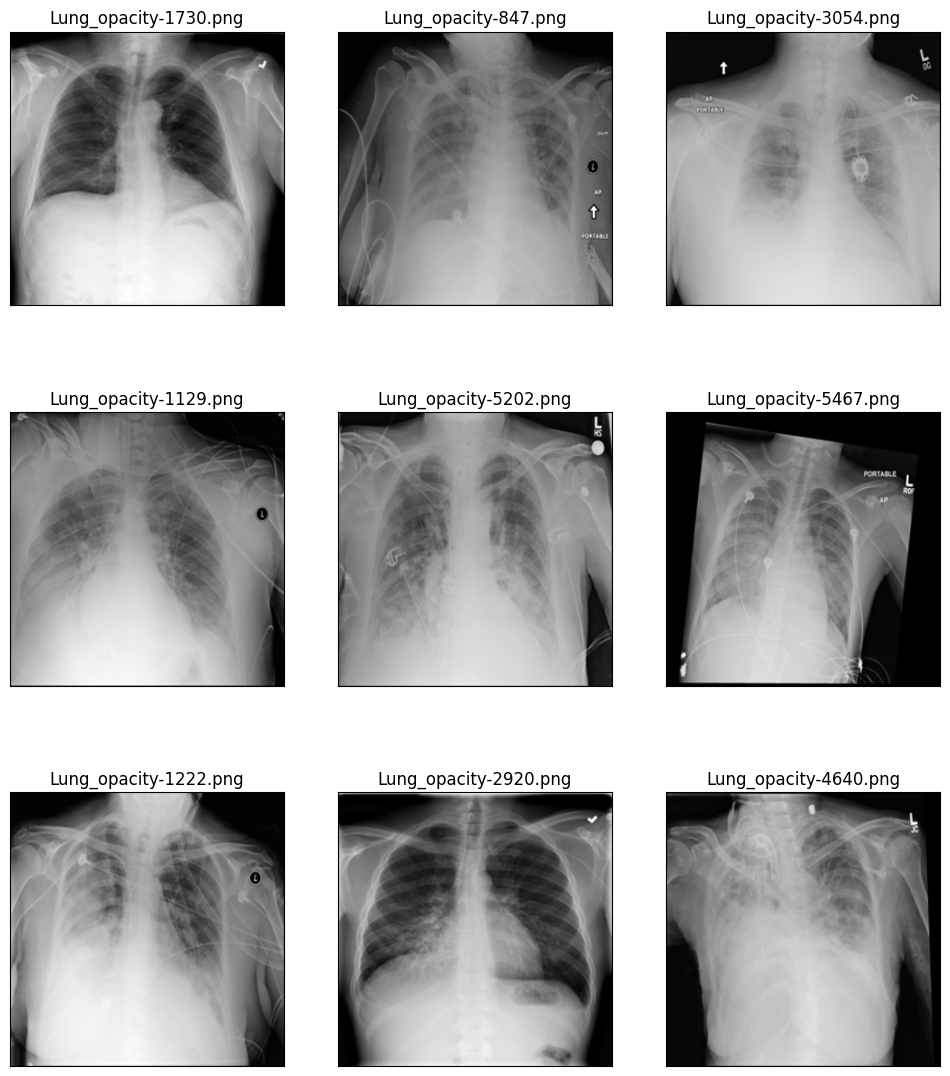

In [19]:
show_sample_images(origin_dictionary_lung_opacity, folder_lung_opacity)

##### Evaluate 'viral_pneumonia' images (show some examples of each origin)

In [20]:
excel_path_viral_pneumonia = os.path.join(folder_path,'Viral Pneumonia.metadata.xlsx')
print(excel_path_viral_pneumonia)
df_viral_pneumonia = pd.read_excel(excel_path_viral_pneumonia)
df_viral_pneumonia.head()

/Users/markusfuchs/Development/Machine Learning Engineer/Covid-19_detection/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx


FILE NAME FORMAT     SIZE  \
0  Viral Pneumonia-1    PNG  256*256   
1  Viral Pneumonia-2    PNG  256*256   
2  Viral Pneumonia-3    PNG  256*256   
3  Viral Pneumonia-4    PNG  256*256   
4  Viral Pneumonia-5    PNG  256*256   

                                                 URL  
0  https://www.kaggle.com/paultimothymooney/chest...  
1  https://www.kaggle.com/paultimothymooney/chest...  
2  https://www.kaggle.com/paultimothymooney/chest...  
3  https://www.kaggle.com/paultimothymooney/chest...  
4  https://www.kaggle.com/paultimothymooney/chest...

In [21]:
df_viral_pneumonia.URL.value_counts()

URL
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia    1345
Name: count, dtype: int64

In [22]:
origin_dictionary_viral_pneumonia = create_origin_dictionary(df_viral_pneumonia)
for url, file_names in origin_dictionary_viral_pneumonia.items():
    print('first file from URL:', url, file_names[0])

first file from URL: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia Viral pneumonia-1.png


URL: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia


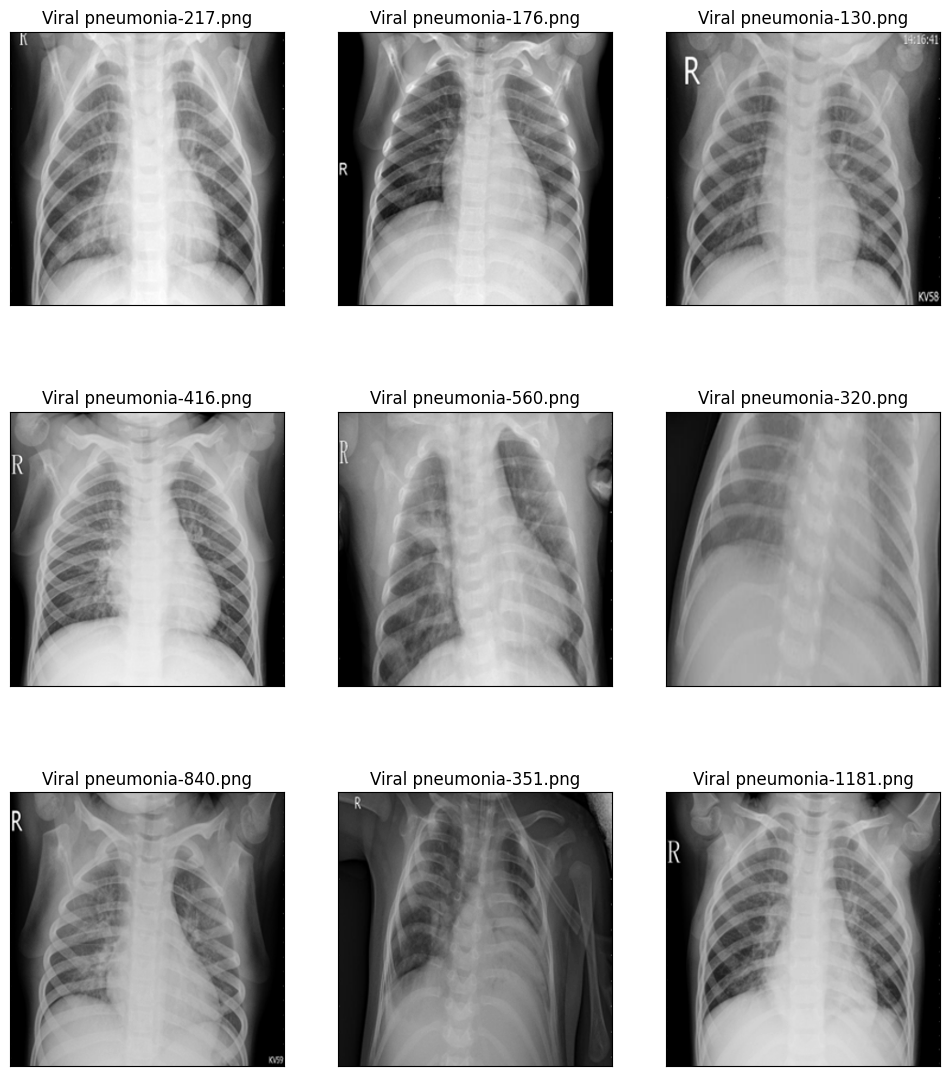

In [23]:
show_sample_images(origin_dictionary_viral_pneumonia, folder_viral_pneumonia)